# __Prueba 1: Análisis de Sentimientos de Twitter__
`Benjamín Meneses`
## Contexto
A continuación se presenta un problema clásico en el análisis de texto: _Extraer la polaridad de sentimiento asociado a un texto_.

Para esto, utilizaremos una base de datos provenientes de CrowdFlower que se entrega como archivo adjunto para esta prueba bajo el nombre de `training_tweets.csv`.

Para descargar los datos puede ejecutar el siguiente código:
```bash
wget https://www.crowdflower.com/wp-content/uploads/2016/07/text_emotion.csv
```
El objetivo general de esta prueba es alcanzar el mejor desempeño posible para clasificar si un tweet tiene una polaridad positiva o negativa en cuanto al sentimiento que expresa.


Para medir el desempeño, se evaluará con un conjunto de datos del cuál no tendrán acceso. De esta manera evitaremos que los modelos aprendan información sobre el conjunto de validación.


## Objetivos
Para alcanzar el objetivo general, su trabajo se puede desagregar en los siguientes puntos:
<ol>
<li>Generar un análisis exploratorio sobre los datos contenidos en el DataFrame,
considerando palabras más comunes y distribución de las clases en el vector
objetivo.</li>
<li>Preprocesamiento de Texto:
  <ul>
    <li>Para trabajar adecuadamente con texto, debemos preprocesar y posteriormente representar cada oración como un conjunto de características.</li>
    <li>Para preprocesar los tweets, debemos transformarlos a lower case. Un problema recurrente en el análisis de texto es la alta ocurrencia de palabras comunes. Se recomienda eliminarlas mediante la declaración de stopwords. Para generar la exclusión de stopwords, podemos utilizar la librería `nltk` (Natural Language ToolKit) y descargar los stopwords con la siguiente instrucción.</li>

```python
import nltk
nltk.download('stopwords')
```
</li>
<li>

Puede refinar los atributos a capturar mediante el proceso de __lemantización__ (la
reducción de variadas palabras con un tronco léxico común; ejemplo: _Organización,
Organiza, y Organizado_ presentan `organi_` como tronco léxico en común) o
__Stemming__ (la reducción de una palabra a una expresión generalizable). Cabe
destacar que ésta última carece de análisis morfológico del lenguaje.</li>
<li>

Posterior a la refinación y preprocesamiento de las palabras, podemos representar
cada oración en una matriz (o corpus) que permitirá reflejar la cantidad de
ocurrencias de $W_i$ palabra en un registro. Para ello, pueden hacer uso de las librerías y
de preprocesamiento `sklearn.feature_extraction.text.CountVectorizer` o
`sklearn.feature_extraction.text.TfidfVectorizer`. De esta manera,
tendremos un conjunto de características es mediante la frecuencia de ocurrencia de
una palabra o término en el texto</li>
</ul>
</li>
<li>
Preparación del vector objetivo y las matrices de entrenamiento y validación:
<ul>
<li>Nos interesa trabajar con dos tipos de emociones: positivas o negativas. Para ello
deberá generar la recodificación de cada una de las clases en una de las dos
emociones:</li>
<table width="80%" style="margin: 20px 0px 20px 0px">
<tr><th>Original</th><th>Recodificación</th></tr>
<tr><td>'worry'</td><td>Negativa</td></tr>
<tr><td>'happiness'</td><td>Positiva</td></tr>
<tr><td>'sadness'</td><td>Negativa</td></tr>
<tr><td>'love'</td><td>Positiva</td></tr>
<tr><td>'surprise'</td><td>Positiva</td></tr>
<tr><td>'fun'</td><td>Positiva</td></tr>
<tr><td>'relief'</td><td>Positiva</td></tr>
<tr><td>'hate'</td><td>Negativa</td></tr>
<tr><td>'empty'</td><td>Negativa</td></tr>
<tr><td>'enthusiasm'</td><td>Positiva</td></tr>
<tr><td>'boredom'</td><td>Negativa</td></tr>
<tr><td>'anger'</td><td>Negativa</td></tr>
</table>
<li>Si el tweet está asignado como <code>neutral</code>, clasifíquelo aleatoriamente entre positivo o
negativo.</li>
</ul>
</li>
<li>Entrenamiento de modelos:

- En base a los modelos vistos en clase, implemente por lo menos 5. Para cada
uno de ellos justifique la elección de hiper parámetros. Si implementa
búsqueda de grilla para cada uno de ellos, defina el rango de valores a tomar
en cada hiper parámetro.
- Reporte el desempeño de cada modelo en las muestras de entrenamiento y
validación. Comente sobre la capacidad de generalización de cada uno de
ellos haciendo uso de los conceptos vistos en el curso.</li>
<li>Seleccione los 2 mejores modelos, serialicelos y envíalos a evaluación. Recuerde que
el modelo serializado debe ser posterior al <code>fit</code>, para poder ejecutar <code>predict</code> en los
nuevos datos.</li>

</ol>


## __Hito 1__

### Preliminares
Vemos que nos enfrentamos a un problema de clasificación, donde nuestro vector objetivo binario corresponderá a si una cadena de texto corresponde a un sentimiento Positivo o Negativo.

Para atacar el problema realizaremos primero un preprocesamiento de los datos, usando `TfidVectorizer` de `sklearn.feature_extraction.text` para convertir el texto plano a matrices que nos serviran como atributos para el modelo. Refactorizaremos el atributo `'sentiment'` según las especificaciones y aleatorizando el valor `neutral` según un `GaussianNB` entrenado con el resto de los sentimientos. Luego haremos un análisis gráfico del vector objetivo frente a la ocurrencia de las palabras.

Finalmente implementaremos 5 modelos usando distintos algoritmos, defieniendo para cada uno los hiperparámetros que correspondan y usando una búsqueda de grilla con validación cruzada cada vez que sea posible. Estos son:
1. `LogisticRegression`:
   - `penalty`: `['l2', 'l1', 'elasticnet']`
   - `fit_intercept`: `[True, False]`
   - `class_weight`: `[None, 'balanced', {'0': .4, '1': .5}, {'1': .4, '0': .5}]`
2. `GDA`:
   - `priors`: `[[.5, .5], [.33, .66], [.66, .33]]`
3. `SVC`
   - `class_weight`: `[None, 'balanced', {'0': .4, '1': .5}, {'1': .4, '0': .5}]`
   - `kernel`: `['rbf', 'poly', 'linear', 'sigmoid']`
   - `C`: `[0.1, 1, 10, 100, 1000]`
   - `gamma`: `[0.000001, 0.001, 0.1, 0.5, 1]`
4. `Decision Tree con GradientBoost`:
   - `learning_rate`: `[0.01, 0.1, 0.5]`
   - `n_estimators`: `[100, 500, 1000, 2000]`
   - `subsample`: `[0.2,0.5,0.8]`
5. `VotingClassifier`: Ensamblado con los modelos anteriores.


### Aspectos Computacionales

Importamos las librerías a utilizar

In [133]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

import nltk

sentimientosPositivos = ['happiness', 'love', 'surprise', 'fun', 'relief', 'enthusiasm']
sentimientosNegativos = ['worry', 'sadness', 'hate', 'empty', 'boredom', 'anger']

In [64]:
df = pd.read_csv('training_tweets.csv').drop(columns=['Unnamed: 0'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   content    30000 non-null  object
 1   sentiment  30000 non-null  object
dtypes: object(2)
memory usage: 468.9+ KB


Se agregan los frames de pruebas

In [290]:
# Importamos los tweets de los candidatos y los concatenamos
presis = ['artes_oficial', 'gabrielboric', 'joseantoniokast', 'marcoporchile', 'Parisi_oficial', 'ProvosteYasna', 'sebastiansichel']
testDf = pd.DataFrame(columns=['username','author_id','tweet_id','texto','text'])
repliesDf = pd.DataFrame(columns=['username','author_id','tweet_id','texto','text'])
# iteramos sobre los candidatos
for p in presis:
    # leemos el archivo
    dfCandidato = pd.read_csv('presis/'+p+'.csv')
    dfRepliesCandidato = pd.read_csv('presis/'+p+'_replies.csv')
    # concatenamos
    testDf = testDf.append(dfCandidato, ignore_index=True)
    repliesDf = repliesDf.append(dfRepliesCandidato, ignore_index=True)
# Nos quedamos con las columnas que queremos
testDf = testDf[['username','text']]
testDf['content'] = testDf['text']
testDf = testDf.drop(columns=['text'])
repliesDf = repliesDf[['username','text']]
repliesDf['content'] = repliesDf['text']
repliesDf = repliesDf.drop(columns=['text'])

### Análisis exploratorio y Feature Engineering de espacio de atributos

Importados los datos haremos la recodificación de `'content'`, aparte de la recodificación de palabras agregaremos mas metadata del atributo como:
- la cantidad de palabras
- el largo en caractéres

Además, Conseguiremos la cantidad de menciones y hashtags y luego los reemplazaremos en los textos a `'@@@'` y `'###'` respectivamente. Esto con el objetivo de evitar que nuestro modelo se sesgue con los usuarios/hashtags que se les da mas odio o positividad y a la vez manteniendo la información de cuantas menciones y hashtags tiene el tweet. Como sólo usaremos algorítmos que usan la frecuencia de las palabras y documentos, no habrá pérdida de información al quitar las palabras.

In [291]:
# Creamos la función para preprocesar los tweets
def intialParsing(df):
    copy = df.copy()
    # Agregamos las columnas
    copy['n_words'] = df['content'].apply(lambda x: len(x.split()))
    copy['n_chars'] = df['content'].apply(lambda x: len(x))
    # Conseguir la cantidad de menciones y hashtags
    copy['n_mentions'] = df['content'].apply(lambda x: len(re.findall(r'@\w+', x)))
    copy['n_hashtags'] = df['content'].apply(lambda x: len(re.findall(r'#\w+', x)))
    # Reemplazar las menciones y hashtags por una palabra
    copy['content'] = df['content'].apply(lambda x: re.sub(r'@\w+', '@@@', x))
    copy['content'] = copy['content'].apply(lambda x: re.sub(r'#\w+', '###', x))
    return copy

df = intialParsing(df)
testDf = intialParsing(testDf)
repliesDf = intialParsing(repliesDf)


Revisamos la pérdida de datos

<AxesSubplot:>

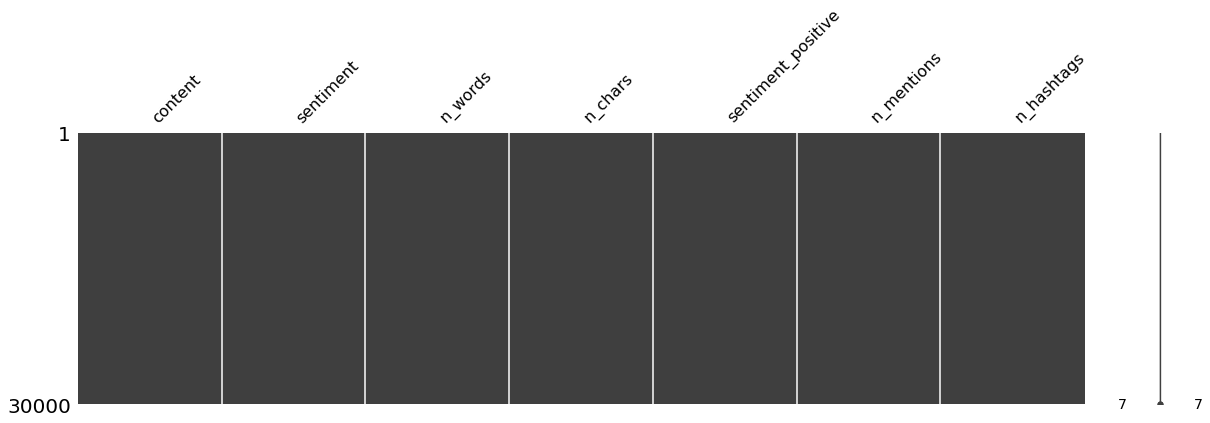

In [6]:
msno.matrix(df, figsize=(20, 5))

Vemos que no hay datos perdidos en la muestra lo que es bastante bueno.

Luego implementaremos la refactorización de la cadena de texto a matrices usando `TfidfVectorizer`.

In [15]:
# Vemos el total de palabras de los tweets
words_vectorizer = CountVectorizer(stop_words=nltk.corpus.stopwords.words('english'))
words_vectorizer.fit(df['content'])
wordsMatrixDf = pd.DataFrame(words_vectorizer.transform(df['content']).toarray(), columns=words_vectorizer.get_feature_names())
wordsMatrixDf.shape

(30000, 26732)

Vemos que son 26732 palabras distintas, por lo tanto sería bueno poder disminuir la dimensionalidad.

Haremos entonces un análisis de la frecuencia de las palabras para así buscar límites superiores e inferiores para nuestro algorítmo `TfidTransformer`. Luego con las palabras ignoradas haremos un modelo usando `LatentDirchletAllocation` y agregaremos las probabilidades de los tópicos inferidos como columnas a nuestro espacio de atributos.

Text(0.5, 1.0, 'mas de 2000 ocurrencias')

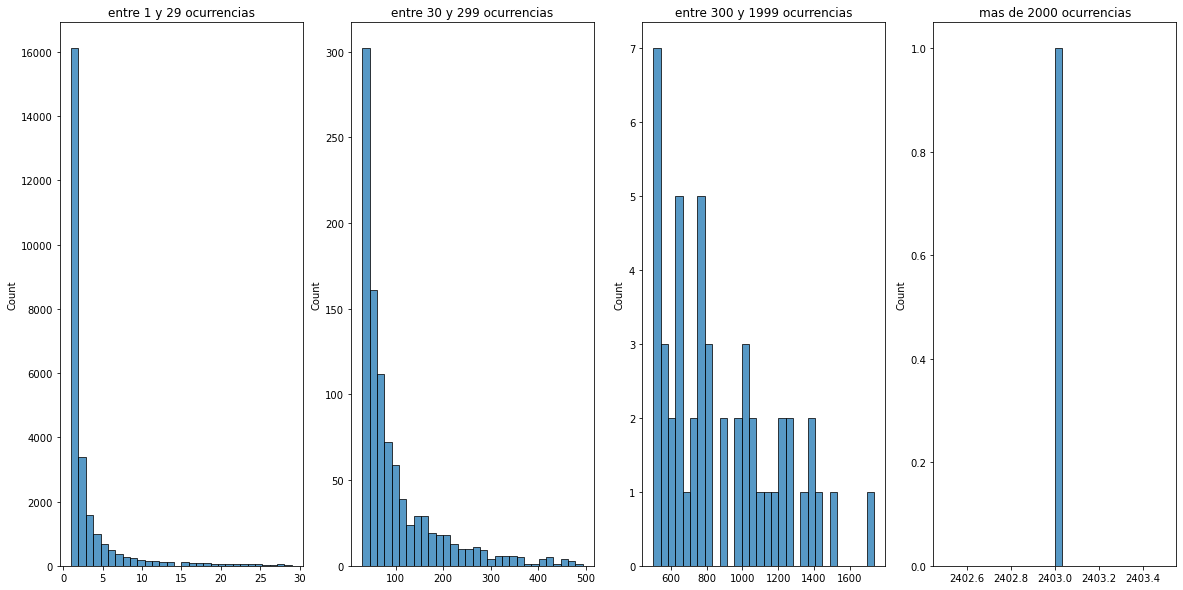

In [16]:
# Convertimos el arreglo de frecuencias en una serie
wordSeries = wordsMatrixDf.sum(axis=0)
# Graficamos los rangos de frecuencia de las palabras
fig, ax = plt.subplots(1, 4, figsize=(20, 10))
sns.histplot(x=wordSeries.loc[lambda x: (x > 0) & (x < 30)], data=wordSeries, bins=30, ax=ax[0])
ax[0].set_title('entre 1 y 29 ocurrencias')
sns.histplot(x=wordSeries.loc[lambda x: (x >= 30) & (x < 501)], data=wordSeries, bins=30, ax=ax[1])
ax[1].set_title('entre 30 y 299 ocurrencias')
sns.histplot(x=wordSeries.loc[lambda x: (x >= 501) & (x < 2001)], data=wordSeries, bins=30, ax=ax[2])
ax[2].set_title('entre 300 y 1999 ocurrencias')
sns.histplot(x=wordSeries.loc[lambda x: (x >= 2001)], data=wordSeries, bins=30, ax=ax[3])
ax[3].set_title('mas de 2000 ocurrencias')

Vemos que si definieramos un límite inferior $freq < 3$ eliminaríamos casi 20.000 palabras. Por otro lado, un límite superior tentativo sería $freq > 1000$, pues así no quitamos tantas palabras más y dejamos al menos 3 ordenes de magnitud en frecuencias para el posterior algorítmo `Tfidf`.

In [17]:
discardedWords = wordSeries.loc[lambda x: (x < 3)].index
len(discardedWords)

19502

In [18]:
# Conseguimos la matriz TF-IDF de las columnas apartadas
tfidfLatent = TfidfTransformer()
tfidfLatentMatrix = tfidfLatent.fit_transform(wordsMatrixDf.loc[:, discardedWords])

In [18]:
# Definimos los hiperparámetros de búsqueda
n_components = [3, 5, 10, 15]
learning_decay = [0.8, 0.7, 0.65, 0.5]
max_iter = [10]
# Creamos el pipeline del modelo
dirchletModel = GridSearchCV(LatentDirichletAllocation(random_state=19137, n_jobs=3), {'n_components': n_components, 'learning_decay': learning_decay, 'max_iter': max_iter}, cv=5, n_jobs=3, verbose=1)


In [19]:
# Entrenamos y mostramos los mejores parámetros
dirchletModel.fit(tfidfLatentMatrix)
dirchletModel.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  5.2min
[Parallel(n_jobs=3)]: Done  80 out of  80 | elapsed:  9.2min finished


{'learning_decay': 0.8, 'max_iter': 10, 'n_components': 3}

Vemos que la mejor combinación es `'learning_decay': 0.8, 'max_iter': 10, 'n_components': 3`

In [21]:
# Instanciamos el mejor modelo
ldaModel = LatentDirichletAllocation(random_state=19137, n_components=3, learning_decay=0.8, max_iter=10, n_jobs=-1)
ldaModel.fit(tfidfLatentMatrix)

LatentDirichletAllocation(learning_decay=0.8, n_components=3, n_jobs=-1,
                          random_state=19137)

In [10]:
# Mostramos las mejores palabras
for i, topic_dist in enumerate(ldaModel.components_):
    topic_words = discardedWords[np.argsort(topic_dist)][:-20:-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

Topic 0: fuk cuba campers supporters crow assuming schoolers richmond wierd journal stones opposed miranda limping shitload hawk wayyy chickened uuuup
Topic 1: axsujx passengers darkness buggers argentina shaken jeep dehydrated ikr butts spork rocio trace schooling hala trendy commitments bri wookie
Topic 2: harlow ontario architecture colbert diploma images fourteen scandalous knighty overdid innocence wavves sundress jkphn subjects aaahhh friendorfollow jjj unemployment


Agregaremos entonces las columnas probabilidad de pertenencia a cada tópico inferido  

In [24]:
# esta transformación la podemos coercionar a un dataframe de la siguiente manera
topics_for_each_doc = pd.DataFrame(np.round(ldaModel.transform(tfidfLatentMatrix), 3), index=df.index )
#agregamos identificadores de columna
topics_for_each_doc.columns = list(map(lambda x: "T: {}".format(x), range(1, ldaModel.n_components + 1)))
# concatenamos las probabilidades de tópico por documento a nuestra matriz original
concatenated_df = pd.concat([df.drop(columns=['content']), topics_for_each_doc], axis=1)

In [30]:
concatenated_df.columns

Index(['sentiment', 'n_words', 'n_chars', 'sentiment_positive', 'n_mentions',
       'n_hashtags', 'T: 1', 'T: 2', 'T: 3'],
      dtype='object')

In [26]:
# Refactorizamos usando TfidfTransformer
tfidf = TfidfVectorizer(stop_words=nltk.corpus.stopwords.words('english'), min_df=3)
tfidfMatrix = tfidf.fit_transform(df['content'])
tfidfMatrix.shape

(30000, 7113)

In [141]:
# Agregamos el Dataframe de features
refactoredDf = pd.concat([concatenated_df, pd.DataFrame(tfidfMatrix.toarray(), columns=tfidf.get_feature_names())], axis=1)

In [292]:
# Crearemos la funcion para transformar el dataframe
def getTransformedDataframe(df):
    # Conseguimos la matriz TF-IDF de las columnas apartadas
    testLatentMatrix = tfidfLatent.transform(pd.DataFrame(words_vectorizer.transform(df['content']).toarray(), columns=words_vectorizer.get_feature_names()).loc[:, discardedWords])
    # Generamos el dataframe con las probabilidades de tópico por documento y lo concatenamos al dataframe original
    topics_for_each_doc_test = pd.DataFrame(np.round(ldaModel.transform(testLatentMatrix), 3), index=df.index )
    topics_for_each_doc_test.columns = list(map(lambda x: "T: {}".format(x), range(1, ldaModel.n_components + 1)))
    partialDf = pd.concat([df.drop(columns=['content']), topics_for_each_doc_test], axis=1)
    # Generamos la transformación TF-IDF de las columnas conservadas
    tfidfMatrix = tfidf.transform(df['content'])
    # Retornamos el df final con toda la información
    return pd.concat([partialDf, pd.DataFrame(tfidfMatrix.toarray(), columns=tfidf.get_feature_names())], axis=1)
# Lo aplicamos para los dataframe de test
rf_testDf = getTransformedDataframe(testDf.drop(columns=['username']))
rf_repliesDf = getTransformedDataframe(repliesDf.drop(columns=['username']))

In [164]:
repliesDf.shape

(1030, 6)

### Análisis y refactoring de vector objetivo

Primero haremos la aleatorización de la columna neutral, para ello usaremos un modelo de NaiveBayes con Gaussianas.

Graficamos el vector objetivo

<AxesSubplot:xlabel='sentiment_positive', ylabel='count'>

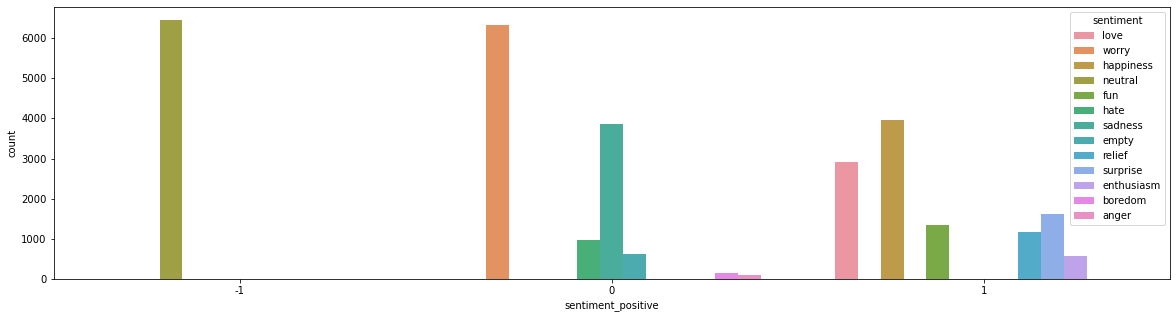

In [73]:
# Empezamos la refactorización del vector objetivo
refactoredDf['sentiment_positive'] = df['sentiment'].apply(lambda x: 1 if x in sentimientosPositivos else 0 if x in sentimientosNegativos else -1)
# Graficamos la distribución de los valores
plt.figure(figsize=(20,5))
sns.countplot(x='sentiment_positive', hue='sentiment', data=refactoredDf)


Vemos que los sentimientos positivos tienen una distribución un poco mas pareja que los sentimientos negativos, ya que hay muy pocos ejemplos de `'boredom'` y `'anger'` comparados con las de `'worry'`.

Vemos que hay muchos tweets como `'neutral'`, lo que indica que la aleatorización es importante para le desempeño final del modelo. Continuamos con el entrenamiento del modelo para aleatorizar estas observaciones.

In [74]:
# Separamos las muestra según si son neutrales o no
nonNeutral = refactoredDf[refactoredDf['sentiment_positive'] != -1].drop(columns=['sentiment'])
neutral = refactoredDf[refactoredDf['sentiment_positive'] == -1].drop(columns=['sentiment', 'sentiment_positive'])
# Separamos las muestras de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(nonNeutral.drop(columns=['sentiment_positive']), nonNeutral['sentiment_positive'], test_size=0.33, random_state=42)


In [75]:
# Entrenamos el modelo
nbModel = GaussianNB()
nbModel.fit(X_train, y_train)
# Reportamos las métricas
print(classification_report(y_test, nbModel.predict(X_test)))

              precision    recall  f1-score   support

           0       0.63      0.51      0.56      3957
           1       0.58      0.69      0.63      3815

    accuracy                           0.60      7772
   macro avg       0.60      0.60      0.60      7772
weighted avg       0.60      0.60      0.60      7772



Vemos que a lo menos es mejor que una predicción aleatoria equi-probable por lo que continuamos a la refactorizacion de los valores neutrales en `'sentiment'`

In [76]:
# guardamos las predicciones de las clases 'neutral'
neutral['sentiment_positive'] = nbModel.predict(neutral)
# Guardamos el espacio de atributos final
refactoredDf = pd.concat([neutral, nonNeutral])

In [77]:
# Verificamos que nuestro vector objetivo sea binario
refactoredDf['sentiment_positive'].value_counts()

1    15593
0    14407
Name: sentiment_positive, dtype: int64

## __Hito 2__




Comenzaremos con la separación de muestras:

In [78]:
# Separamos la muestra de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(refactoredDf.drop(columns=['sentiment_positive']), refactoredDf['sentiment_positive'], test_size=0.33, random_state=42)

1. `LogisticRegression`:
   - `penalty`: `['l2', 'l1', 'elasticnet']`
   - `fit_intercept`: `[True, False]`
   - `class_weight`: `[None, 'balanced']`


In [79]:
# Definimos los hiperparámetros de búsqueda
penalty = ['l1', 'l2', 'elasticnet']
fit_intercept = [True, False]
class_weight = ['balanced', None]
# Entrenamos el modelo
logisticSearch = GridSearchCV(LogisticRegression(random_state=19137), {'penalty': penalty, 'fit_intercept': fit_intercept, 'class_weight': class_weight}, cv=5, n_jobs=-1, verbose=1)
logisticSearch.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  3.8min finished
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=19137), n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             verbose=1)

In [80]:
# Evaluamos el desempeño del modelo
print(f'Mejores Hiperparametros: {logisticSearch.best_params_}')
print(classification_report(y_test, logisticSearch.predict(X_test)))

Mejores Hiperparametros: {'class_weight': None, 'fit_intercept': False, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.71      0.68      0.69      4752
           1       0.72      0.75      0.73      5148

    accuracy                           0.71      9900
   macro avg       0.71      0.71      0.71      9900
weighted avg       0.71      0.71      0.71      9900



Los mejores parámetros son `{'class_weight': 'balanced', 'fit_intercept': False, 'penalty': 'l2'}`

2. `QDA`:
   - `priors`: `[[.5, .5], [.33, .66], [.66, .33]]`

In [41]:
# Definimos los hiperparámetros de búsqueda para QDA
priors = [None, [.33, .66], [.66, .33]]
# Entrenamos el modelo
qdaSearch = GridSearchCV(QuadraticDiscriminantAnalysis(), {'priors': priors}, cv=5, n_jobs=-1, verbose=1)
qdaSearch.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 40.6min finished
D:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


GridSearchCV(cv=5, estimator=QuadraticDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'priors': [None, [0.33, 0.66], [0.66, 0.33]]},
             verbose=1)

In [42]:
# Evaluamos el desempeño del modelo
print(f'Mejores Hiperparametros: {qdaSearch.best_params_}')
print(classification_report(y_test, qdaSearch.predict(X_test)))

Mejores Hiperparametros: {'priors': None}
              precision    recall  f1-score   support

           0       0.54      0.73      0.62      3957
           1       0.56      0.36      0.44      3815

    accuracy                           0.55      7772
   macro avg       0.55      0.54      0.53      7772
weighted avg       0.55      0.55      0.53      7772



Mejor hiperparámetro `{'priors': None}`

3. `RandomForestClassifier`
   - `max_depth`: `[None, 5, 15, 25]`
   - `n_estimators`: `[50, 200, 500]`
   - `max_features`: `['auto', 'sqrt', 'log2']`


Este modelo es pesado computacionalmente, y como usaremos `oob_score = True` disminuiremos la cantidad de validaciones cruzadas

In [21]:
# Definimos los hiperparámetros de búsqueda para Random Forest
max_depth = [None, 5, 15, 25]
n_estimators = [50, 200, 500]
max_features = ['auto', 'sqrt', 'log2']
# Entrenamos el modelo
rfSearch = GridSearchCV(RandomForestClassifier(random_state=19137, oob_score=True), {'max_depth': max_depth, 'n_estimators': n_estimators, 'max_features': max_features}, cv=2, n_jobs=-1, verbose=1)
rfSearch.fit(X_train, y_train)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 27.1min finished


GridSearchCV(cv=2,
             estimator=RandomForestClassifier(oob_score=True,
                                              random_state=19137),
             n_jobs=-1,
             param_grid={'max_depth': [None, 5, 15, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 200, 500]},
             verbose=1)

In [22]:
# Evaluamos el desempeño del modelo
print(f'Mejores Hiperparametros: {rfSearch.best_params_}')
print(classification_report(y_test, rfSearch.predict(X_test)))

Mejores Hiperparametros: {'max_depth': None, 'max_features': 'log2', 'n_estimators': 500}
              precision    recall  f1-score   support

           0       0.69      0.69      0.69      4752
           1       0.71      0.72      0.72      5148

    accuracy                           0.70      9900
   macro avg       0.70      0.70      0.70      9900
weighted avg       0.70      0.70      0.70      9900



Mejores hiperparámetros son `{'max_depth': None, 'max_features': 'log2', 'n_estimators': 500}`

4. `Decision Tree con GradientBoost`:
   - `learning_rate`: `[0.01, 0.1, 0.5]`
   - `n_estimators`: `[100, 500, 1000, 2000]`
   - `subsample`: `[0.2,0.5,0.8]`

In [24]:
import time

In [30]:
# Definimos los hiperparámetros de búsqueda para Gradient Boost
learning_rate = [.01, .5]
max_features = [25, 'sqrt', 'log2']
max_depth = [25, 50, 100]
subsample = [.3, .5, 1]

# Definimos el holdout para validar el modelo
X_hold_train, X_hold_test, y_hold_train, y_hold_test = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

for i in max_features:
    for j in learning_rate:
        for k in max_depth:
            for l in subsample:
                print(f'Hiperparametros: max_features:{i} learning_rate:{j} max_depth:{k} subsample:{l}')
                gbm = GradientBoostingClassifier(random_state=19137, learning_rate=j, n_estimators=500, max_depth=k, subsample=l, max_features=i, n_iter_no_change=50, validation_fraction=.33)
                tic = time.perf_counter()
                gbm.fit(X_hold_train, y_hold_train)
                toc = time.perf_counter()
                print(f'Tiempo de entrenamiento: {toc - tic:0.4f} segundos.')
                print(classification_report(y_hold_test, gbm.predict(X_hold_test)))
                print("=="*16)

Hiperparametros: max_features:25 learning_rate:0.01 max_depth:25 subsample:0.3
Tiempo de entrenamiento: 24.5745 segundos.
              precision    recall  f1-score   support

           0       0.72      0.60      0.65       983
           1       0.67      0.77      0.72      1027

    accuracy                           0.69      2010
   macro avg       0.69      0.69      0.68      2010
weighted avg       0.69      0.69      0.68      2010

Hiperparametros: max_features:25 learning_rate:0.01 max_depth:25 subsample:0.5
Tiempo de entrenamiento: 35.1525 segundos.
              precision    recall  f1-score   support

           0       0.73      0.60      0.66       983
           1       0.67      0.78      0.72      1027

    accuracy                           0.69      2010
   macro avg       0.70      0.69      0.69      2010
weighted avg       0.70      0.69      0.69      2010

Hiperparametros: max_features:25 learning_rate:0.01 max_depth:25 subsample:1
Tiempo de entrenamiento: 

Vemos que la mejor selección de hiperparámetros es: `{max_features:'sqrt', learning_rate:0.01, max_depth:50, subsample:1}`

5. `VotingClassifier`: Ensamblado con los modelos anteriores.

Finalmente instanciaremos todos los mejores modelos en un Voting Classifier, omitiremos QDA debido a su pésimo desempeño.

In [85]:
# Creamos el VotingClassifier
estimators = [(
    'LogisticRegression', LogisticRegression(random_state=19137, penalty='l2', fit_intercept=False, class_weight='balanced'),
), (
    'RandomForest', RandomForestClassifier(random_state=19137, max_depth=None, n_estimators=500, max_features='log2', oob_score=True),
), (
    'GradientBoosting', GradientBoostingClassifier(random_state = 19137, learning_rate = .01, n_estimators = 500, max_depth = 50, subsample = 1, max_features = 'sqrt'),
)]
# Entrenamos el modelo
votingModel=VotingClassifier(estimators=estimators, voting='soft', n_jobs=-1, verbose=1)
votingModel.fit(X_train, y_train)


VotingClassifier(estimators=[('LogisticRegression',
                              LogisticRegression(class_weight='balanced',
                                                 fit_intercept=False,
                                                 random_state=19137)),
                             ('RandomForest',
                              RandomForestClassifier(max_features='log2',
                                                     n_estimators=500,
                                                     oob_score=True,
                                                     random_state=19137)),
                             ('GradientBoosting',
                              GradientBoostingClassifier(learning_rate=0.01,
                                                         max_depth=50,
                                                         max_features='sqrt',
                                                         n_estimators=500,
                                               

In [86]:
# Evaluamos el desempeño del modelo
print(classification_report(y_test, votingModel.predict(X_test)))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      4752
           1       0.72      0.73      0.73      5148

    accuracy                           0.71      9900
   macro avg       0.71      0.71      0.71      9900
weighted avg       0.71      0.71      0.71      9900



In [301]:
repliesDf['voting_predict_proba'] = votingModel.predict_proba(rf_repliesDf)[:,1]
repliesDf['voting_predict_interval'] = repliesDf['voting_predict_proba'].apply(lambda x: 'Negativo' if x < .35 else 'Levemente Negativo' if x < .45 else 'Neutral' if x < .55 else 'Levemente Positivo' if x < .65 else 'Positivo')
testDf['voting_predict_proba'] = votingModel.predict_proba(rf_testDf)[:,1]
testDf['voting_predict_interval'] = testDf['voting_predict_proba'].apply(lambda x: 'Negativo' if x < .35 else 'Levemente Negativo' if x < .45 else 'Neutral' if x < .55 else 'Levemente Positivo' if x < .65 else 'Positivo')


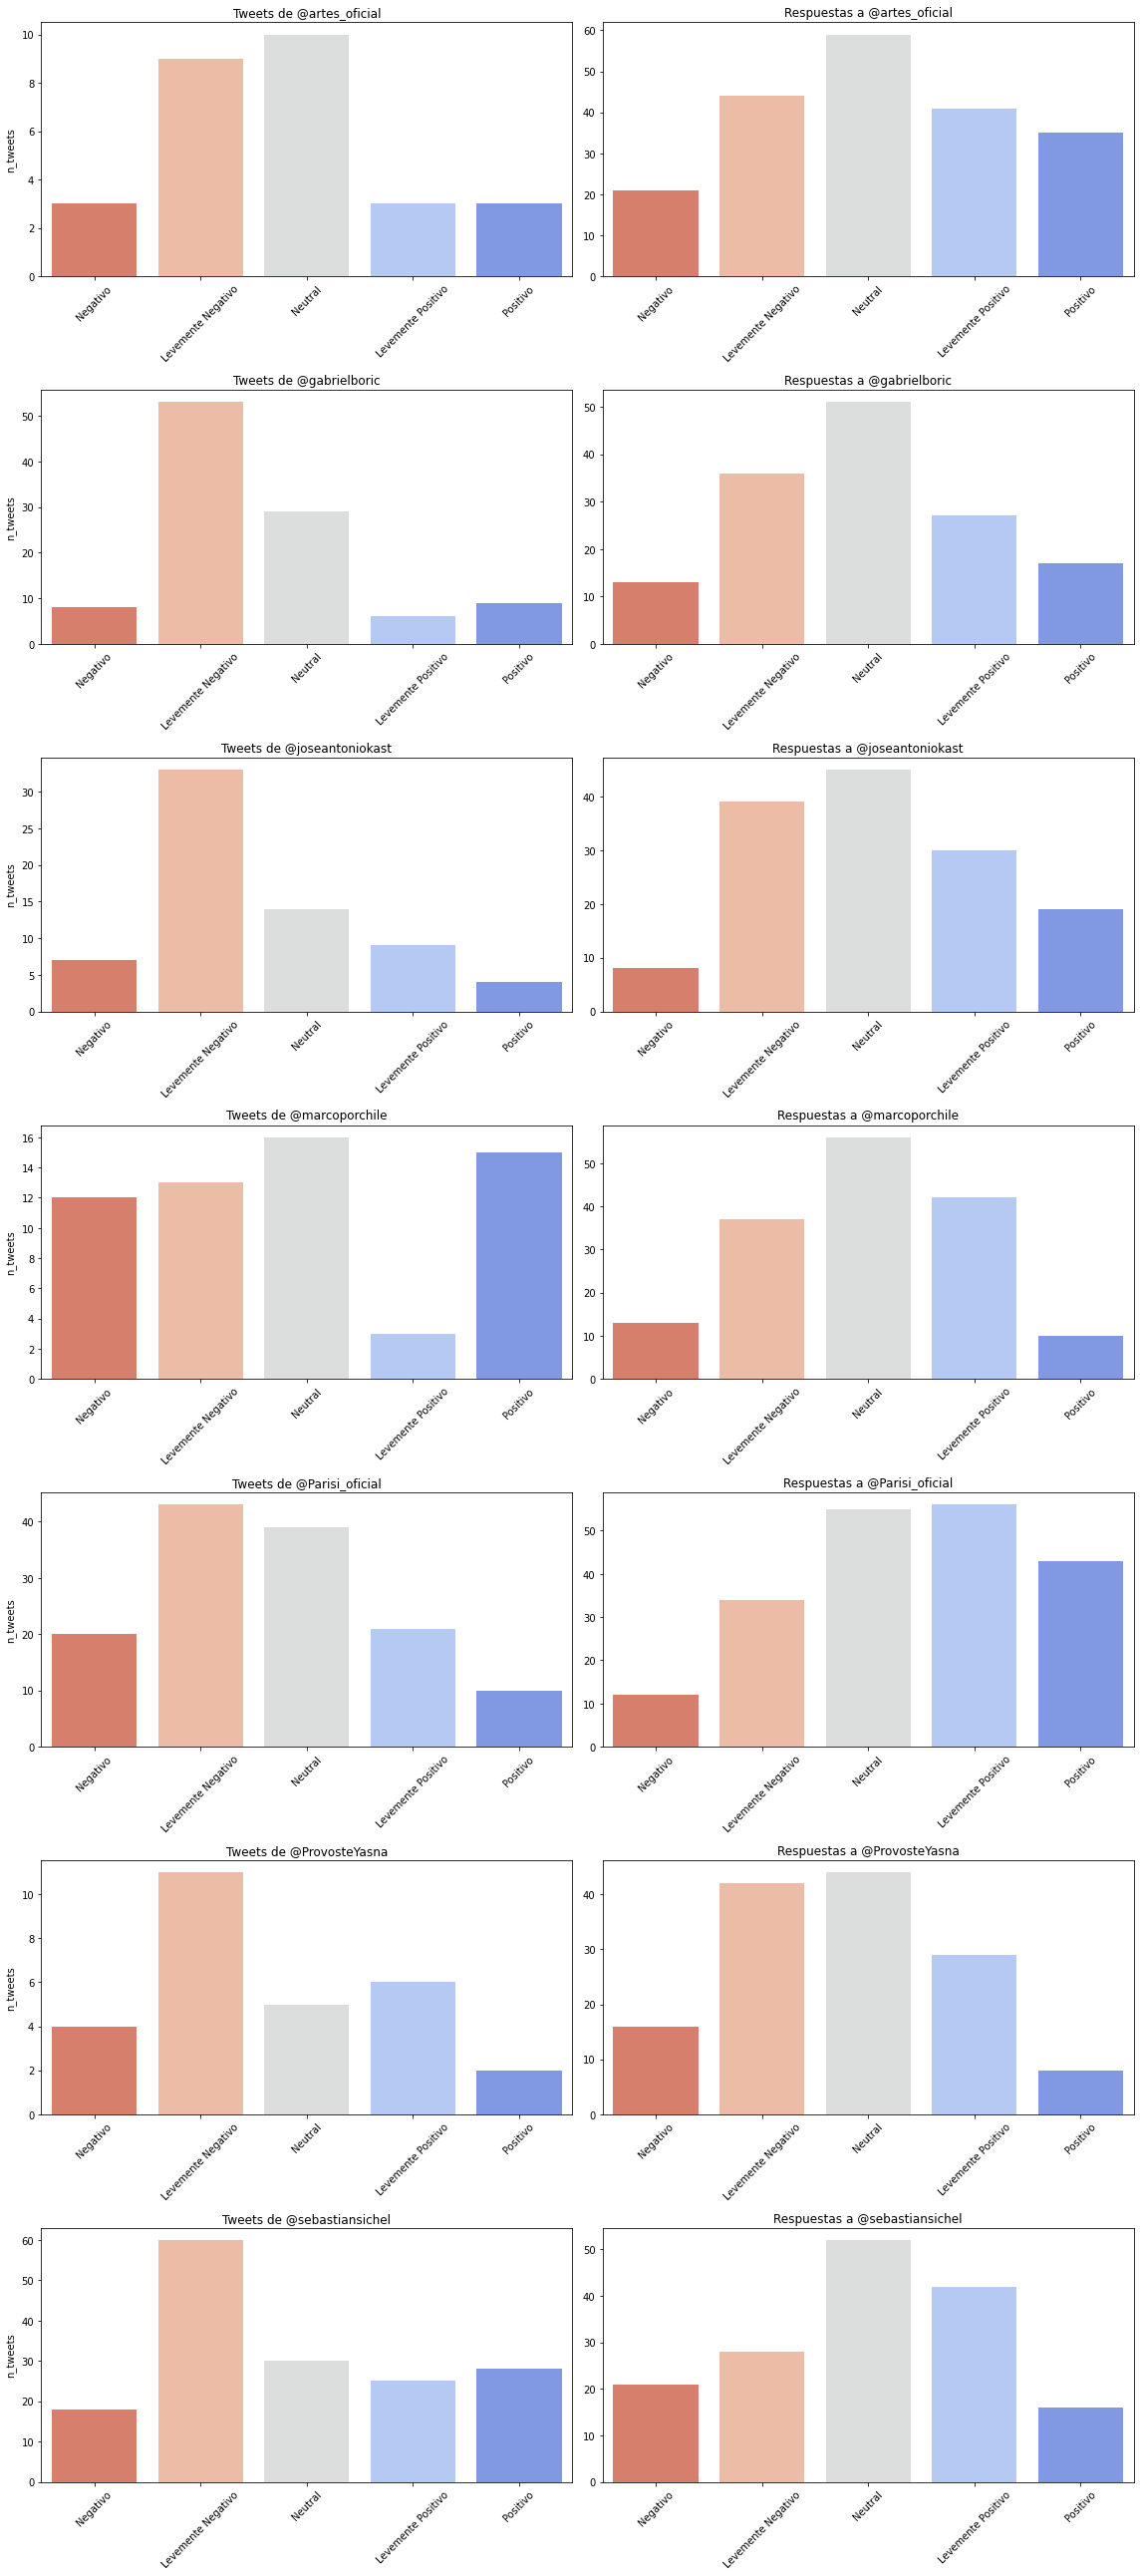

In [304]:
fig, ax = plt.subplots(7, 2, sharex=False, sharey=False, figsize=(16,36))
for i, presi in enumerate(presis):
    sns.countplot(x='voting_predict_interval', palette='coolwarm_r', ax=ax[i][0], data=testDf[testDf['username']==presi], order=['Negativo', 'Levemente Negativo', 'Levemente Positivo', 'Positivo'])
    sns.countplot(x='voting_predict_interval', palette='coolwarm_r', ax=ax[i][1], data=repliesDf[repliesDf['username']==presi], order=['Negativo', 'Levemente Negativo', 'Levemente Positivo', 'Positivo'])
    # Se definen los estilos de los ejes
    ax[i][0].set_title(f'Tweets de @{presi}')
    ax[i][0].set_xlabel('')
    ax[i][0].set_ylabel('n_tweets')
    ax[i][0].set_xticklabels(['Negativo', 'Levemente Negativo', 'Levemente Positivo', 'Positivo'], rotation=45)
    # Se definen los estilos de los ejes
    ax[i][1].set_title(f'Respuestas a @{presi}')
    ax[i][1].set_xlabel('')
    ax[i][1].set_ylabel('')
    ax[i][1].set_xticklabels(['Negativo', 'Levemente Negativo', 'Levemente Positivo', 'Positivo'], rotation=45)

plt.tight_layout()

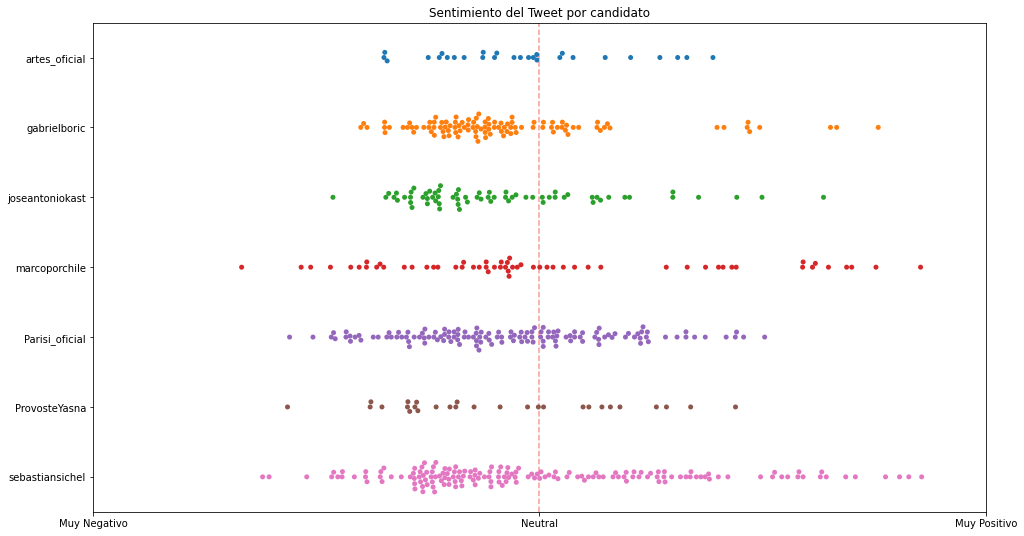

In [295]:
plt.figure(figsize=(16,9))
sns.swarmplot(x='voting_predict_proba', y='username', data=testDf, marker='o')
plt.axvline(x=0.5, color='r', linestyle='--', alpha=.4)
plt.title('Sentimiento del Tweet por candidato')
plt.ylabel('')
plt.xlabel('')
plt.xticks([0,.5, 1.0], ['Muy Negativo', 'Neutral' ,'Muy Positivo']);

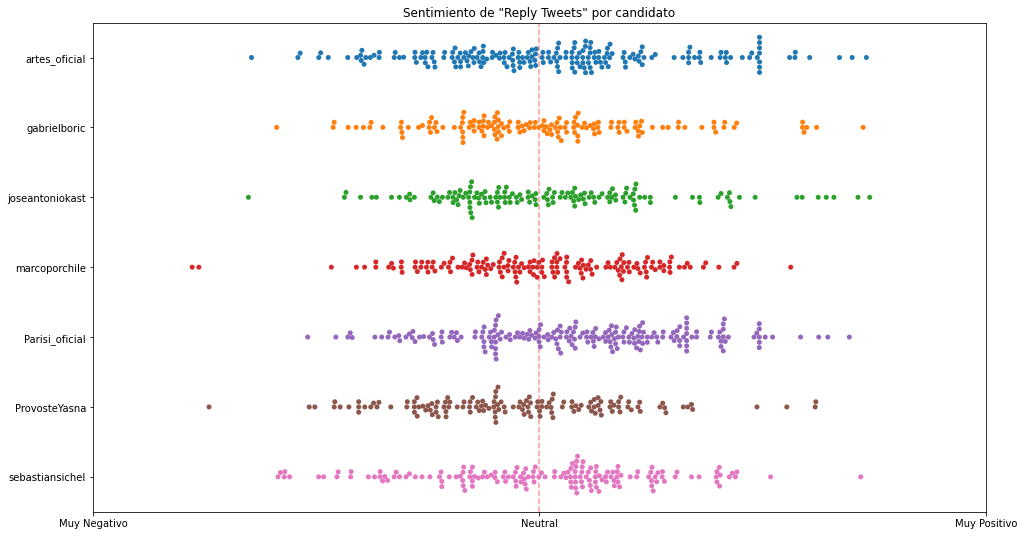

In [296]:
plt.figure(figsize=(16,9))
sns.swarmplot(x='voting_predict_proba', y='username', data=repliesDf, marker='o')
plt.axvline(x=0.5, color='r', linestyle='--', alpha=.4)
plt.title('Sentimiento de "Reply Tweets" por candidato')
plt.ylabel('')
plt.xlabel('')
plt.xticks([0,.5, 1.0], ['Muy Negativo', 'Neutral' ,'Muy Positivo']);